# Analyses des features

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Datas/train.csv")

In [ ]:
df.head(5)

## Analyses des types de donnée

In [ ]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

Feature datetime au format texte   
Le reste, features numériques

### Analyse de Datetime

In [3]:
df.datetime.head()

0    2011-01-01 00:00:00
1    2011-01-01 01:00:00
2    2011-01-01 02:00:00
3    2011-01-01 03:00:00
4    2011-01-01 04:00:00
Name: datetime, dtype: object

Format de type date => à transformer judicieusement en entier  
Relevé d'heure en heure

### Analyse des features numériques

In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


* holiday | workingday : vacances | hors vacances et weekends => 0 ou 1 => No or Yes
* season : saisons compris entre 1 et 4 => 4 saisons dans l'année   
     1 = spring, 2 = summer, 3 = fall, 4 = winter 
* weather : météo compris entre 1 et 4 => relatif au climat  
     * 1: Clear, Few clouds, Partly cloudy, Partly cloudy
     * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
     * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
     * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
* temp : Températures comprises entre 0.82 et 41°C
* atemp : températures ressenties entre 0.76 et 45.455°C
* humidity : humidité relative comprise entre 0 et 100%
* windspeed : vitesse du vent entre 0 et 57 (unité?)
* casual : nombre de locations par  des utilisateurs non enregistrés/jour
* registered : nombre de locations par  des utilisateurs enregistrés/jour
* count : nombre de locations = casual + registered

## Analyses des valeurs manquantes

In [7]:
df.isna().describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886,10886,10886,10886,10886,10886,10886,10886,10886,10886,10886
unique,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False
freq,10886,10886,10886,10886,10886,10886,10886,10886,10886,10886,10886,10886


Aucunes valeurs manquantes pour chaque features

## Analyse répartition

array([[<AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>],
       [<AxesSubplot:title={'center':'weather'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>],
       [<AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'casual'}>],
       [<AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'count'}>, <AxesSubplot:>]],
      dtype=object)

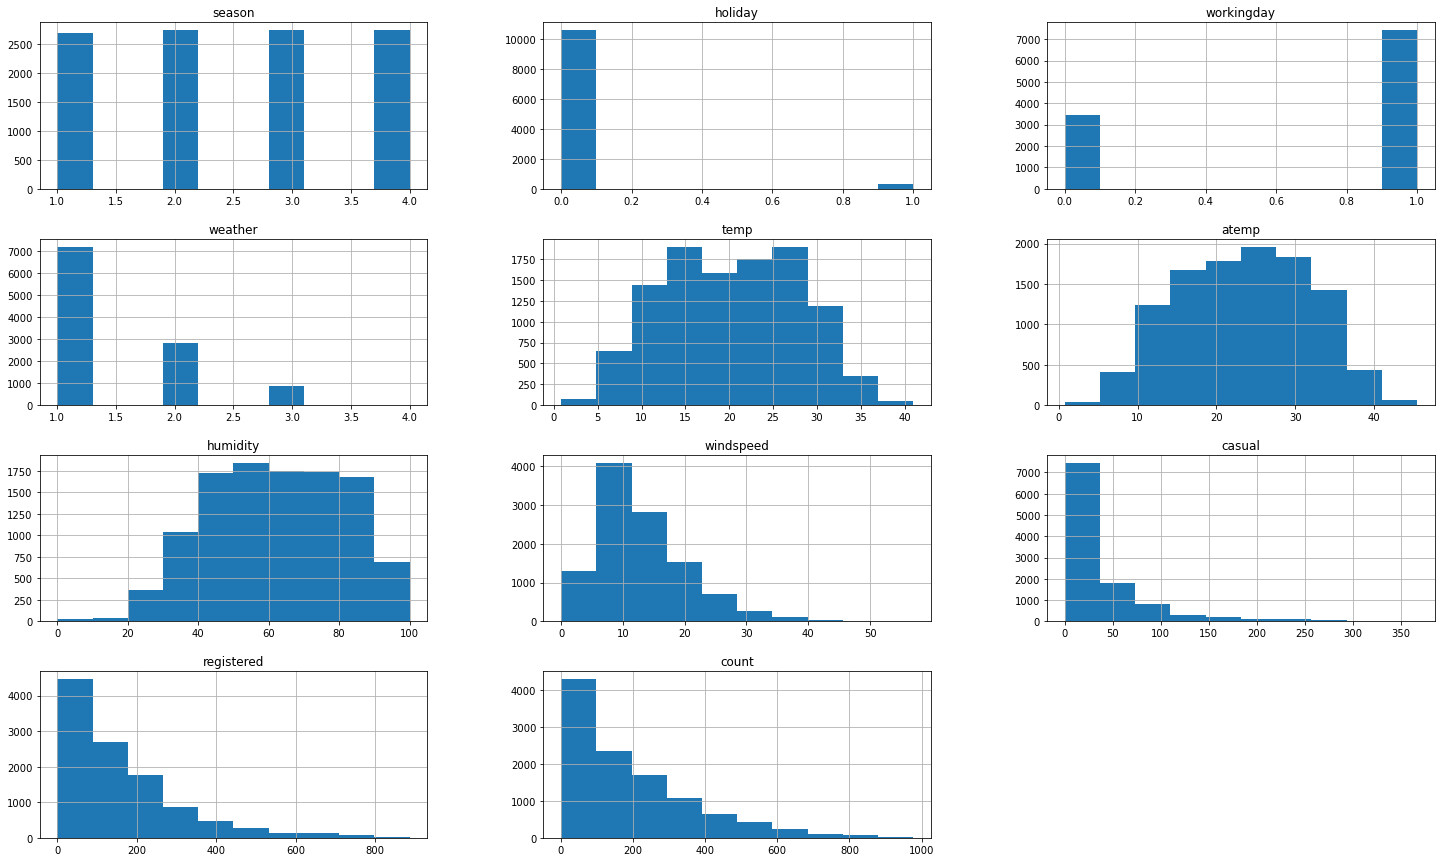

In [39]:
df.hist(figsize=(25,15))

weather : peu de donnèes pour temps très mauvais  
holiday : peu de donnèes pendant les jours de vacance  
Données bien réparties dans l'année (voir season)

In [18]:
print(" Nb de ligne :", len(df),"\n Test registered+casual :", df["count"][df["count"] == df["registered"]+df["casual"]].count())

 Nb de ligne : 10886 
 Test registered+casual : 10886


* Transformer datetime en jours
* Fusion de weather 3 et 4 (mauvais temps) ?
* Supprimer colonne count pour éviter redondance
* Temp et Atemp peut-être corrélés

## Valeurs abérantes

<AxesSubplot:>

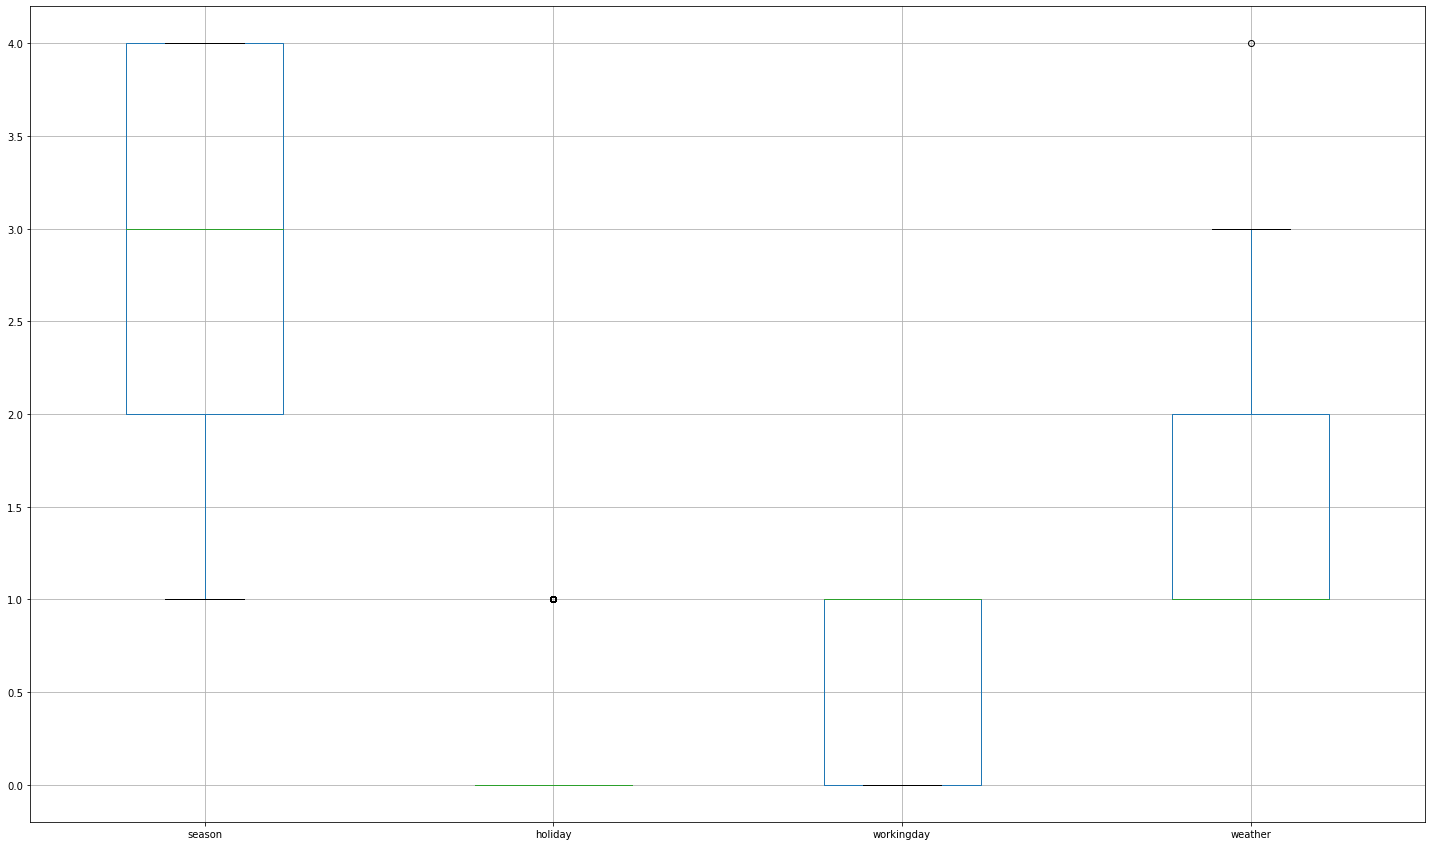

In [26]:
df.iloc[:,:5].boxplot(figsize=(25,15))

<AxesSubplot:>

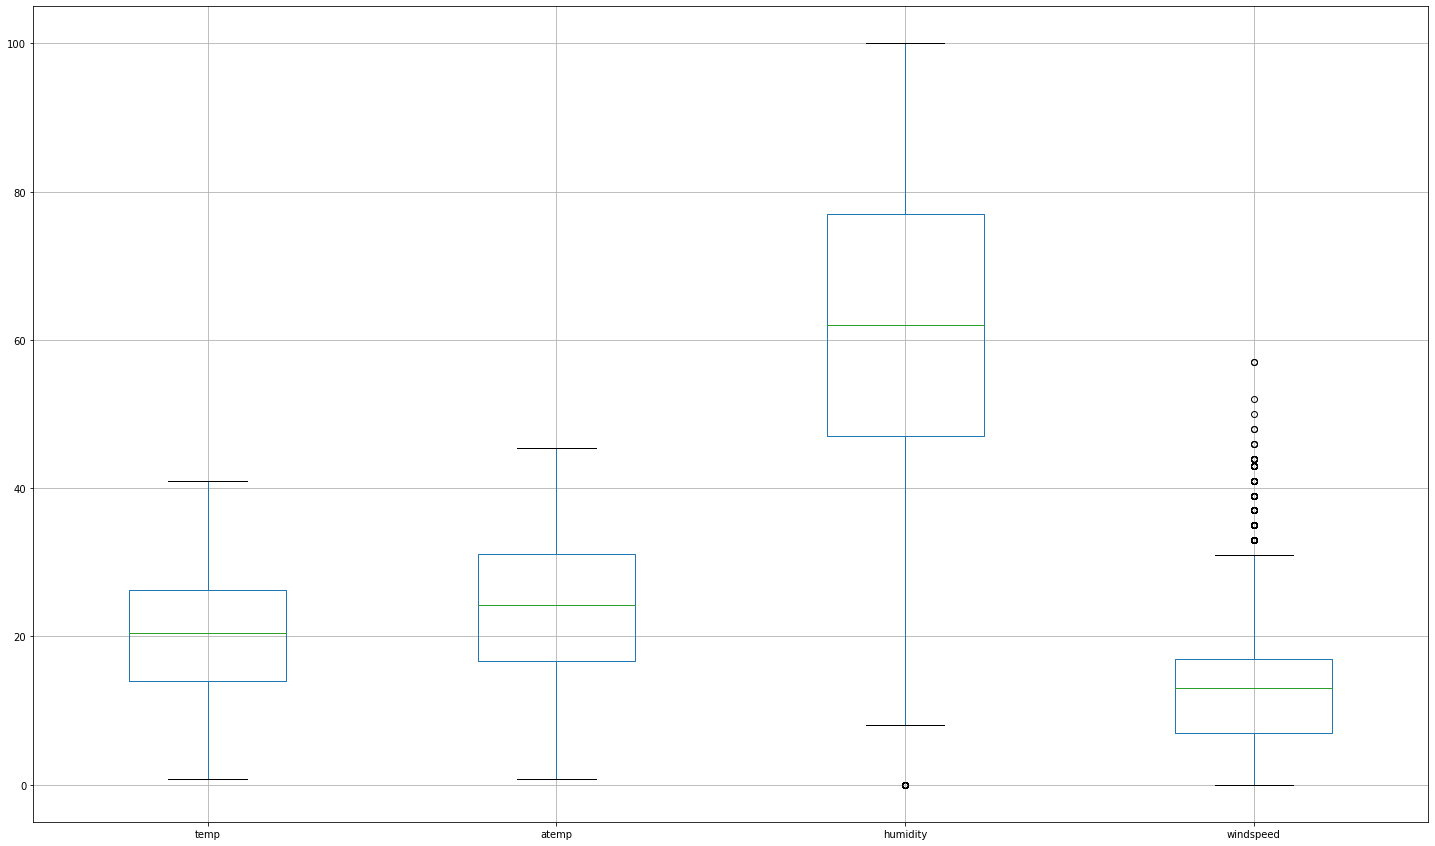

In [29]:
df.iloc[:,5:9].boxplot(figsize=(25,15))

<AxesSubplot:>

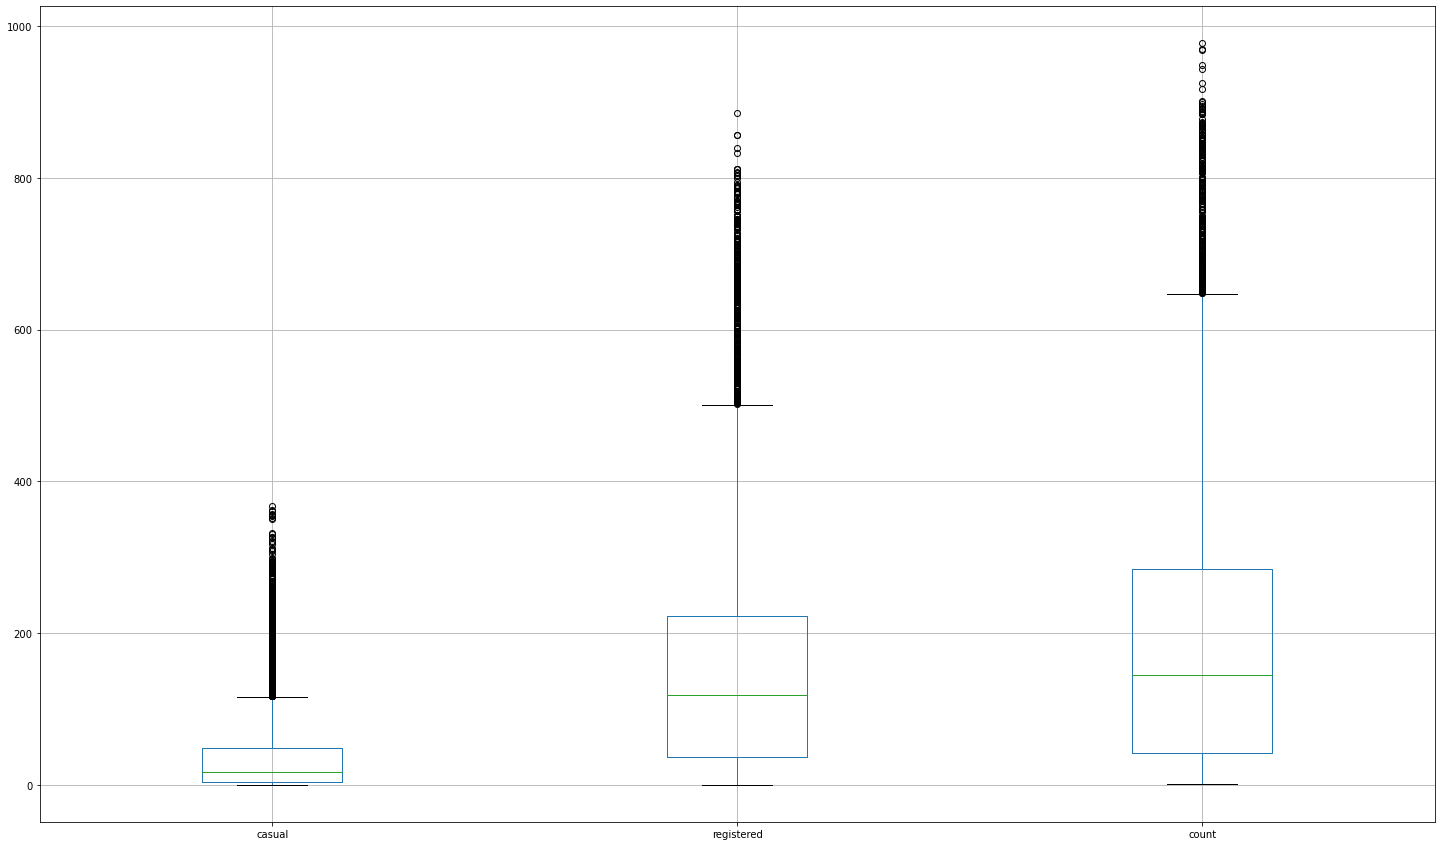

In [30]:
df.iloc[:,9:].boxplot(figsize=(25,15))

In [43]:
print("Nombre d'heures de vacances :", df["holiday"][df["holiday"]==1].count(),"\nRatio :", 100* df["holiday"][df["holiday"]==1].count()/df["holiday"].count())

Nombre d'heures de vacances : 311 
Ratio : 2.856880396839978


Supprimer colonne holiday ?